In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# !yes | pip install yfinance
import yfinance as yf

In [47]:
# Ticker List
ticker_list = ['^GSPC',
'^IXIC',
'^DJI']

In [48]:
#CREATES A DATAFRAME OF THE CLOSE PRICE OF THE ticker_list STARTING FROM 1997
x = 0
while x in range(len(ticker_list)):
    if x == 0:
        df = yf.Ticker(ticker_list[x]).history(start='1997-01-01')['Close'].rename(ticker_list[x])
    else:
        df1 = yf.Ticker(ticker_list[x]).history(start='1997-01-01')['Close'].rename(ticker_list[x])
        df = pd.concat([df, df1], axis=1)
    x += 1
df.head()

,SQ,^GSPC,GDOT,MELI,BAC,PYPL,NVDA,CME,DOCU
Date,,,,,,,,,
1997-01-02 00:00:00-05:00,NaN,737.010010,NaN,NaN,12.589018,NaN,NaN,NaN,NaN
1997-01-03 00:00:00-05:00,NaN,748.030029,NaN,NaN,12.750618,NaN,NaN,NaN,NaN
1997-01-06 00:00:00-05:00,NaN,747.650024,NaN,NaN,12.766783,NaN,NaN,NaN,NaN
1997-01-07 00:00:00-05:00,NaN,753.229980,NaN,NaN,12.782941,NaN,NaN,NaN,NaN
1997-01-08 00:00:00-05:00,NaN,748.409973,NaN,NaN,13.089993,NaN,NaN,NaN,NaN


2009-03-06 00:00:00-05:00


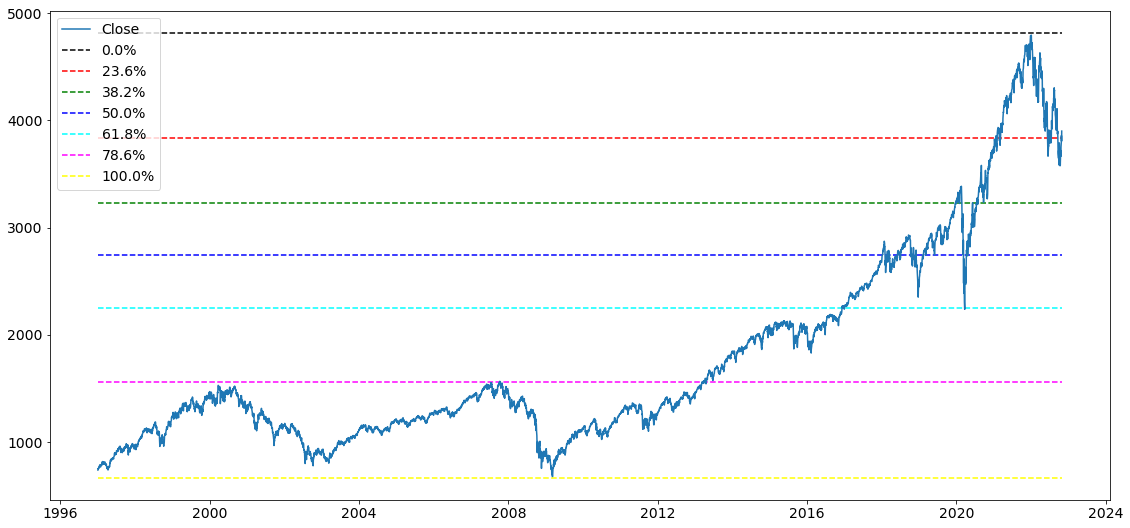

In [77]:
name = "^GSPC"
ticker = yf.Ticker(name)
df = ticker.history(interval="1d",start="1997-01-01",end="2022-10-31")
df.head()

highest_swing = -1
lowest_swing = -1
for i in range(1,df.shape[0]-1):
    if df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and (highest_swing == -1 or df['High'][i] > df['High'][highest_swing]) :
        highest_swing = i
    if df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and (lowest_swing == -1 or df['Low'][i] < df['Low'][lowest_swing]) :
        lowest_swing = i

ratios = [0,0.236, 0.382, 0.5 , 0.618, 0.786,1]
colors = ["black","r","g","b","cyan","magenta","yellow"]
levels = []
max_level = df['High'][highest_swing]
min_level = df['Low'][lowest_swing]
for ratio in ratios:
    if highest_swing > lowest_swing: # Uptrend
        levels.append(max_level - (max_level-min_level)*ratio)
    else: # Downtrend
        levels.append(min_level + (max_level-min_level)*ratio)

plt.rcParams['figure.figsize'] = [19, 9]
plt.rc('font', size=14)
plt.plot(df['Close'])
start_date = df.index[min(highest_swing,lowest_swing)]
end_date = df.index[max(highest_swing,lowest_swing)]
print(start_date)
for i in range(len(levels)):
#     plt.hlines(levels[i],start_date, end_date,label="{:.1f}%".format(ratios[i]*100),colors=colors[i], linestyles="dashed")
    plt.hlines(levels[i],df.index[0], df.index[-1],label="{:.1f}%".format(ratios[i]*100),colors=colors[i], linestyles="dashed")

plt.legend()
plt.show()

In [57]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-01-02 00:00:00-05:00,740.739990,742.809998,729.549988,737.010010,463230000,0,0
1997-01-03 00:00:00-05:00,737.010010,748.239990,737.010010,748.030029,452970000,0,0
1997-01-06 00:00:00-05:00,748.030029,753.309998,743.820007,747.650024,531350000,0,0
1997-01-07 00:00:00-05:00,747.650024,753.260010,742.179993,753.229980,538220000,0,0
1997-01-08 00:00:00-05:00,753.229980,755.719971,747.710022,748.409973,557510000,0,0
...,...,...,...,...,...,...,...
2022-10-24 00:00:00-04:00,3762.010010,3810.739990,3741.649902,3797.340088,4747930000,0,0
2022-10-25 00:00:00-04:00,3799.439941,3862.850098,3799.439941,3859.110107,4843120000,0,0
2022-10-26 00:00:00-04:00,3825.969971,3886.149902,3824.070068,3830.600098,4817310000,0,0


In [59]:
df.shape[0]

6501

In [63]:
print(start_date)

2009-03-06 00:00:00-05:00


In [64]:
type(start_date)

pandas._libs.tslibs.timestamps.Timestamp

In [66]:
highest_swing

6294

In [67]:
lowest_swing

3063

In [76]:
df.index[-1]

Timestamp('2022-10-28 00:00:00-0400', tz='America/New_York')

In [65]:
start_date = df.index[min(highest_swing,lowest_swing)]


In [1]:
end_date = df.index[max(highest_swing,lowest_swing)]


NameError: name 'df' is not defined

In [ ]:
df.hvplot.line(x='Date',y=['^GSPC', '^IXIC', '^DJI'],
              value_label='Close', legend='top', height=500, width=1000)